In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.callbacks import TensorBoard
os.environ["CUDA_VISIBLE_DEVICES"]="0"

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
tbCallBack = TensorBoard(log_dir='./log_tra_red_frq',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)

In [7]:
FAST_RUN = False
IMAGE_WIDTH=480
IMAGE_HEIGHT=744
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [8]:
filenames = os.listdir("./train_frequency/")
ra_dataframe  = pd.read_csv('./rough_data.csv', header=None)
categories = []
for filename in filenames:
    dummy,right  = filename.split("_",1)
    info,right = right.split("_",1)
    number = info[0:-1]
    dire   = info[-1]
    row = 0
    if dire == 'L':
        row = (int(number) - 1)*2
    else:
        row = (int(number) - 1)*2 + 1
    ra_value = ra_dataframe.iloc[row,0]
    if ra_value < 1.6:
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df

,filename,category
0,photo_31L_3.jpg,1
1,photo_21R_1.jpg,1
2,photo_30L_2.jpg,0
3,photo_5L_1.jpg,0
4,photo_34R_1.jpg,1
5,photo_51L_3.jpg,1
6,photo_3L_1.jpg,0
7,photo_36R_1.jpg,1
8,photo_6R_2.jpg,0
9,photo_66L_3.jpg,0


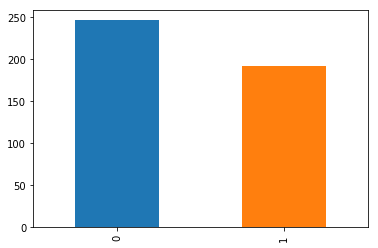

In [9]:
df['category'].value_counts().plot.bar()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 478, 742, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 478, 742, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 239, 371, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 239, 371, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 237, 369, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 237, 369, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 118, 184, 64)      0         
__________

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [tbCallBack,earlystop, learning_rate_reduction]

In [12]:
df["category"] = df["category"].replace({0: 'NG', 1: 'GO'})

In [13]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

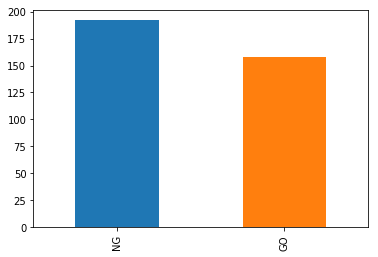

In [14]:
train_df['category'].value_counts().plot.bar()

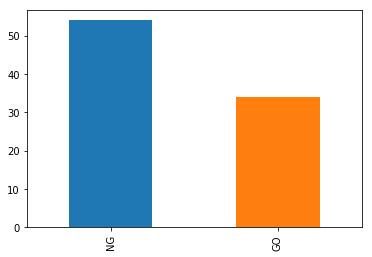

In [15]:
validate_df['category'].value_counts().plot.bar()

In [16]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=10

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 350 validated image filenames belonging to 2 classes.


In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=20
)

Found 88 validated image filenames belonging to 2 classes.


In [19]:
epochs=3 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=10,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/100
35/35 [==============================] - 10s 294ms/step - loss: 0.9107 - acc: 0.6200 - val_loss: 2.9649 - val_acc: 0.4318
Epoch 2/100
35/35 [==============================] - 8s 238ms/step - loss: 0.7346 - acc: 0.7029 - val_loss: 0.8956 - val_acc: 0.6818
Epoch 3/100
35/35 [==============================] - 8s 237ms/step - loss: 0.7906 - acc: 0.6857 - val_loss: 0.8375 - val_acc: 0.6591
Epoch 4/100
35/35 [==============================] - 8s 233ms/step - loss: 0.7692 - acc: 0.6800 - val_loss: 2.3920 - val_acc: 0.4545

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/100
35/35 [==============================] - 8s 239ms/step - loss: 0.6779 - acc: 0.7086 - val_loss: 1.5999 - val_acc: 0.5568
Epoch 6/100
35/35 [==============================] - 8s 240ms/step - loss: 0.5713 - acc: 0.7514 - val_loss: 0.7899 - val_acc: 0.7045
Epoch 7/100
35/35 [==============================] - 8s 234ms/step - loss: 0.5029 - acc: 0.7971 - val_loss: 0.8123 - val